# 1er Demo - Data Science - `Medical Cost`

-----
## Jose Salazar - `Web Developer`
* https://twitter.com/salazarr_js
* https://github.com/salazarr-js
* https://linkedin.com/in/salazarr-js/
-----

![Medic, Clinic](https://images.unsplash.com/photo-1519494026892-80bbd2d6fd0d?crop=entropy&cs=tinysrgb&fit=crop&fm=jpg&h=400&ixid=eyJhcHBfaWQiOjF9&ixlib=rb-1.2.1&q=80&w=1200)

## Contexto

El `dataset` que exploraremos es un conjunto de datos dedicado al costo del tratamiento de diferentes pacientes. No tenemos datos sobre el diagnóstico de los pacientes, pero tenemos otra información que puede ayudarnos a llegar a diferentes conclusiones utiles, como estimar los estados de salud de los pacientes, o predecir los costos de cuidados medicos.

## Contenido de columnas

- **`age`:** Edad del beneficiario principal.
- **`sex`:** Sexo del contratista del seguro, `female`, `male`.
- **`bmi`:** Índice de masa corporal, que proporciona una comprensión del cuerpo, pesos relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal **(kg/m^2)** utilizando la relación de altura a peso.
- **`children`:** Número de niños cubiertos por seguro de salud | Número de dependientes.
- **`smoker`:** Si es fumador.
- **`region`:** El área residencial del beneficiario en US, `northeast`, `southeast`, `southwest`, `northwest`.
- **`charges`:** Costos médicos individuales facturados por el seguro de salud.

![BMI](https://images.agoramedia.com/everydayhealth/gcms/BMI-in-Adults-722x406.jpg)

## Importación de librerias

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de `dataset`

In [46]:
df = pd.read_csv('insurance.csv')

## Exploración basica

In [47]:
rows, columns = df.shape
print( 'Tenemos {} filas y {} columnas'.format(rows, columns) )

Tenemos 1338 filas y 7 columnas


In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [50]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [52]:
df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

## Visualizaciones basicas

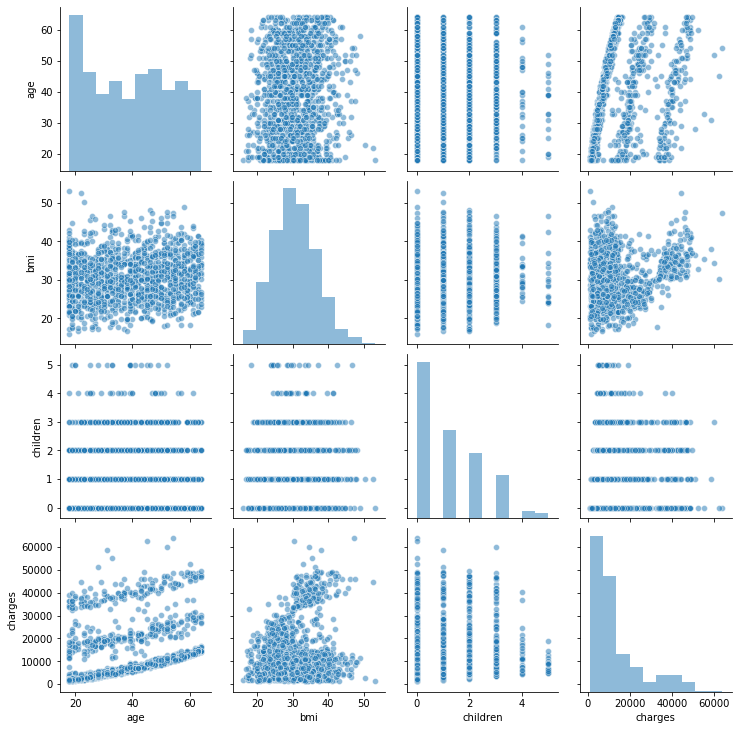

In [53]:
sns.pairplot(data=df,
             plot_kws={'alpha': 0.5}, 
             diag_kws={'alpha': 0.5}) 

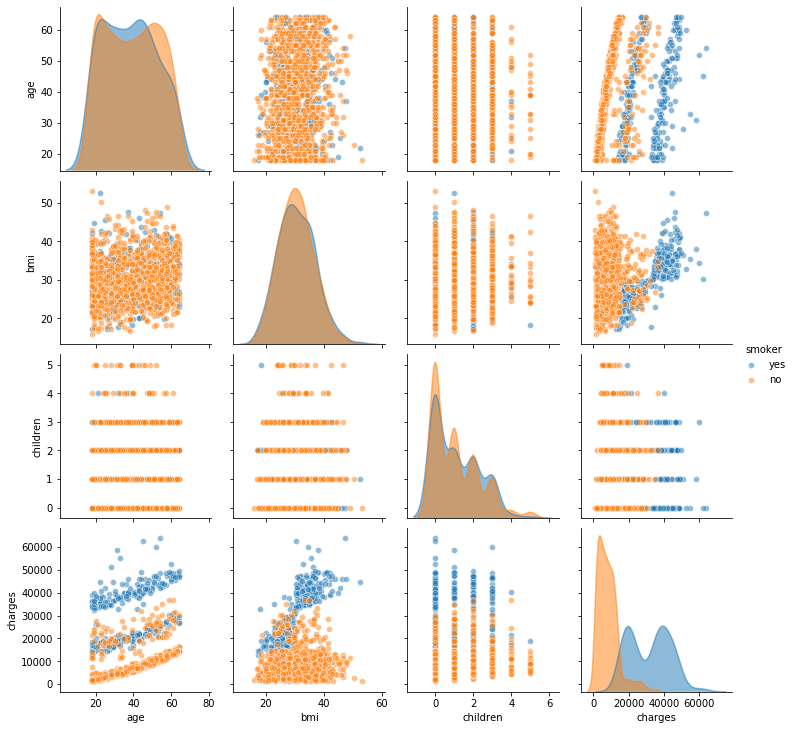

In [54]:
sns.pairplot(data=df, 
             hue="smoker", 
            #  diag_kind="hist",
             plot_kws={'alpha': 0.5}, 
             diag_kws={'alpha': 0.5}) 

## Primeras impresiones `anotaciones`

### `age`
- [x] Que rango de edades tienen mayor densidad?
- [ ] Que rango de edades suelen fumar mas?
- [ ] Que rango de edades tienen la mayor cantidad de obesos?
- [ ] Que rando de edades tienen la mayor cantidad de hijos?
- [ ] Que rango de edades suelen tener mayor gastos medicos?
- [ ] La edad afecta los gastos medicos?

### `sex`
- [x] Que genero tiene la mayor densidad?
- [ ] Que genero suele fumar mas?
- [ ] Que genero tiene la mayor cantidad de obesos?
- [ ] Que genero tiene la mayor cantidad de hijos?
- [ ] Que genero suele tener mayor gasto medico?
- [x] El genero afecta el gasto medico?

### `bmi`
- [ ] Que rango de bmi tiene mayor densidad?
- [ ] El bmi afecta el gasto medico?

- [X] El promedio del `BMI` indica que hay un indice de `Obesidad` alto


### `children`
- [ ] Que cantidad de hijos tiene mayor densidad
- [ ] Los padres con hijos fuman?

### `smoker`
- [ ] Densidad de fumadores
- [ ] Los fumadores tienen mayor gastos medicos?

### `region`
- Que region tiene mayor densidad

### `charges`
- Los gastos medicos aumentan en relacion a la `edad`
- los gastos medicos se ven grandemente afectados por `smoker`

## Consideraciones 🚸

> - No tenemos datos o columnas con fechas por tanto no es necesario procesarlas `parse_dates`
> - Se pueden considerar como `dummies` los datos de las columnas `sex`, `smoker`, de manera que procesandolas pueda ser mas facil analizarlas [link](#Codificación-de-características-categóricas.)
> - Se pueden agregar mas columnas para representar la columna `BMI` columnas `dummies` segun si pertenece a los diferentes grupos `underweight`, `normal`, `overweight`, `obese`, `extremely_obese` [link](#Codificación-de-características-categóricas.)
> - Se pueden mapear los valores de la columna `smoker` a valores `booleanos` [link](#Codificación-de-características-categóricas.)
> - Es posible que se encuentren datos atipicos `outliers` en la columna `BMI`
> - La `correlación` no toma de manera correcta las columnas `sex` y `smoker` pero se pueden codificar [link](#Codificación-de-características-categóricas.)
> - La columna `bmi` actualmente es numerica pero puede ser facilmente transportada a su versión categórica solo para facilitar algunas concluciones

## Valores Faltantes

In [55]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Anotaciones
> A pesar que nuestro `dataset` es pequeño ya esta limpia y sin valores `NaN`, por lo cual no necesita que implementemos acciones especificas con los valores faltantes 🍻

## Conversión de características/variables categóricas

Para que la correlacion nos de valores significativos en relacion a las columnas `sex` y `smoker`, las cuales podemos considerar como `categoricas`, las manejaremos como variables `dummies` y las codificaremos o mapearemos a valores enteros.


In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

# SEX
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

# SMOKER
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

# REGION
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Observaciones
> - En principio iba a usar la funcion `.get_dummies()`
> - La funcion `.map()` tambien era una opcion, que me ayudaba a mapear valores usando un `dict`, util en el caso de `sex` `smoker` y `region`

## Correlación

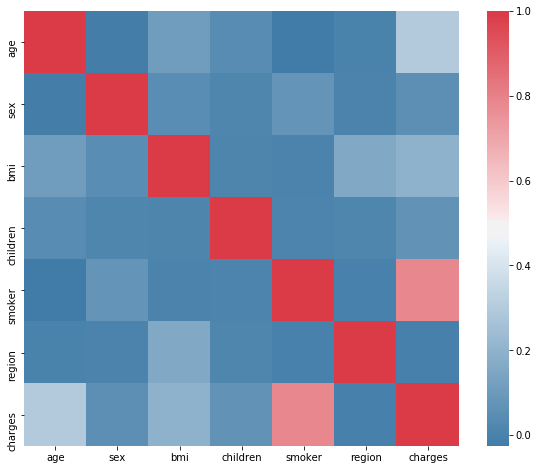

In [58]:
plt.subplots(figsize=(10, 8))

sns.heatmap(df.corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True)

### Observaciones

-----
- [Kaggle Link](https://www.kaggle.com/mirichoi0218/insurance)
- [Repo Link](https://github.com/salazarr-js/acamica-ds-demo-1)
